In [ ]:
# Cognifyz Level 1 - Data Analysis Tasks


In [1]:
import pandas as pd
df = pd.read_csv("taskdataset.csv")
print(df.head())
print(df.info())


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [2]:
print(df.isnull().sum())
df = df.dropna(subset=['Cuisines', 'City', 'Aggregate rating'])


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [3]:
print(df.dtypes)
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')


Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [4]:
df = df.drop_duplicates()


In [5]:
df['Cuisines'] = df['Cuisines'].str.strip()
df['City'] = df['City'].str.strip()


In [6]:
df.to_csv("cleaned_taskdataset.csv", index=False)


In [7]:
print(df.describe())


       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.542000e+03   9542.000000  9542.000000  9542.000000   
mean    9.043301e+06     18.179208    64.274997    25.848532   
std     8.791967e+06     56.451600    41.197602    11.010094   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019312e+05      1.000000    77.081565    28.478658   
50%     6.002726e+06      1.000000    77.192031    28.570444   
75%     1.835260e+07      1.000000    77.282043    28.642711   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9542.000000  9542.000000       9542.000000   9542.000000  
mean            1200.326137     1.804968          2.665238    156.772060  
std            16128.743876     0.905563          1.516588    430.203324  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

In [10]:
print("Sample data:")
print(df.head())
from collections import Counter
cuisine_series = df['Cuisines'].dropna()

cuisine_list = cuisine_series.str.split(', ').sum()
cuisine_counts = Counter(cuisine_list)

cuisine_df = pd.DataFrame(cuisine_counts.items(), columns=['Cuisine', 'Count']).sort_values(by='Count', ascending=False)

top3 = cuisine_df.head(3)

total_cuisines = cuisine_df['Count'].sum()
percentages = round((top3['Count'] / total_cuisines) * 100, 2)

print("Top 3 cuisines:")
print(top3[['Cuisine', 'Count']])
print("Percentages:")
print(percentages.values)


Sample data:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City 

In [11]:
df = pd.read_csv("taskdataset.csv")
print("\n Raw Data Shape:", df.shape)
print("\n Unique values in 'Cuisines' column:")
print(df['Cuisines'].dropna().unique()[:10])



 Raw Data Shape: (9551, 21)

 Unique values in 'Cuisines' column:
['French, Japanese, Desserts' 'Japanese'
 'Seafood, Asian, Filipino, Indian' 'Japanese, Sushi' 'Japanese, Korean'
 'Chinese' 'Asian, European' 'Seafood, Filipino, Asian, European'
 'European, Asian, Indian' 'Filipino']


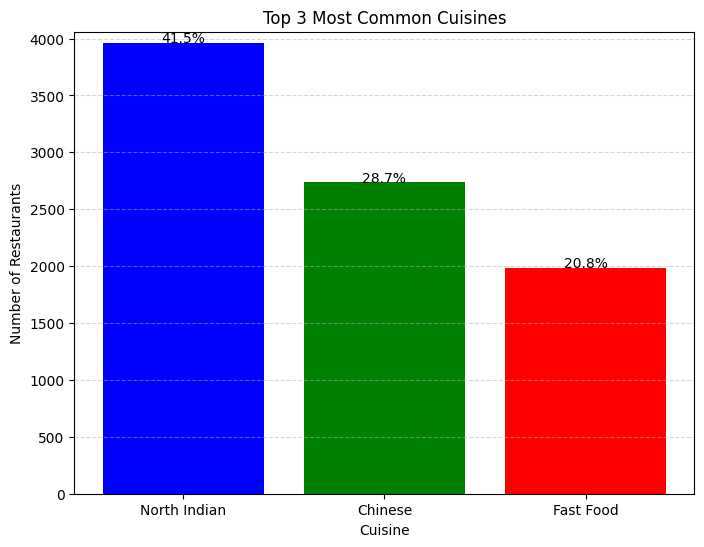

In [12]:
# Task 1: Top Cuisines 
import matplotlib.pyplot as plt
df = pd.read_csv("taskdataset.csv")
df = df.dropna(subset=['Cuisines'])
df['Cuisines'] = df['Cuisines'].astype(str).str.split(', ')
exploded = df.explode('Cuisines')
top3 = exploded['Cuisines'].value_counts().head(3)
total = len(df)
percentages = (top3 / total) * 100
plt.figure(figsize=(8,6))
bars = plt.bar(top3.index, top3.values, color=['blue', 'green', 'red'])
for bar, perc in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f"{perc:.1f}%", ha='center', fontsize=10)
plt.title('Top 3 Most Common Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.ylim(0, top3.max() + 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


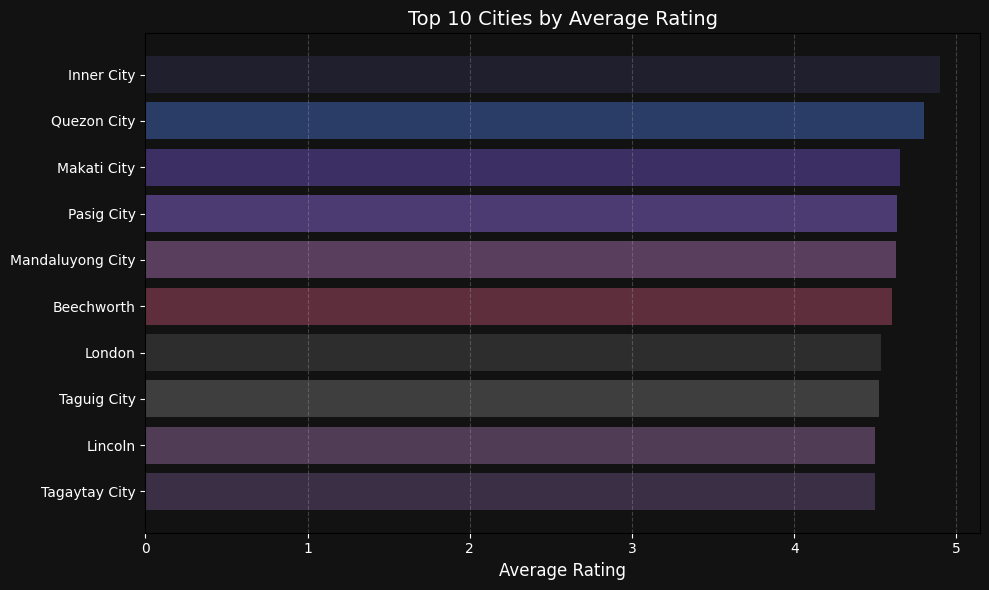

In [13]:
#Task 2: City Analysis 
top10_avg_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
dark_colors = [
    '#1f1f2e', '#2a3d66', '#3b2f63', '#4b3b72', '#593e5d',
    '#5e2e3c', '#2d2d2d', '#3e3e3e', '#503d55', '#3a2f45'
]
plt.figure(figsize=(10, 6))
plt.barh(top10_avg_rating.index, top10_avg_rating.values, color=dark_colors)
plt.title('Top 10 Cities by Average Rating', fontsize=14, color='white')
plt.xlabel('Average Rating', fontsize=12, color='white')
plt.gca().invert_yaxis()  # Highest rating on top
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.gca().set_facecolor('#121212')           
plt.gcf().set_facecolor('#121212')           
plt.tick_params(colors='white')            
plt.xticks(color='white')
plt.yticks(color='white')
plt.tight_layout()
plt.show()


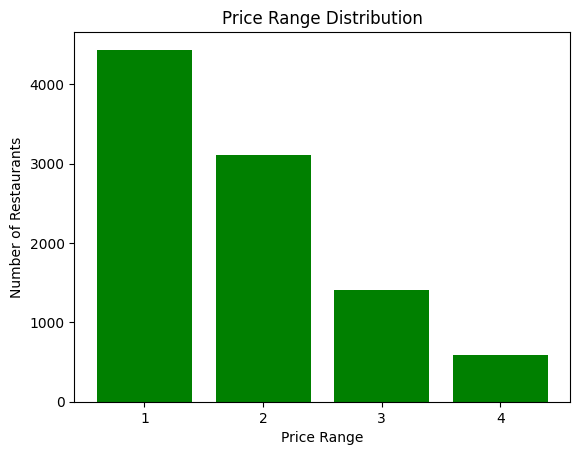

In [19]:
#Task 3: Price Range Distribution 
price_counts = df['Price range'].value_counts().sort_index()
price_percent = (price_counts / len(df)) * 100
plt.bar(price_counts.index.astype(str), price_counts.values, color='green')
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.show()


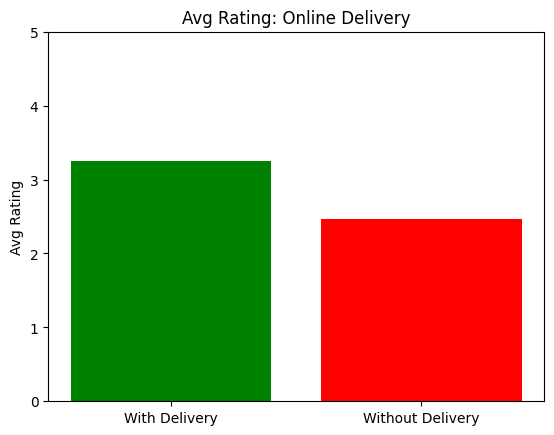

In [20]:
#Task 4: Online Delivery Analysis
delivery_percent = (df['Has Online delivery'].value_counts(normalize=True)['Yes']) * 100
with_delivery = df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
without_delivery = df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean()
plt.bar(['With Delivery', 'Without Delivery'], [with_delivery, without_delivery], color=['green', 'red'])
plt.title('Avg Rating: Online Delivery')
plt.ylabel('Avg Rating')
plt.ylim(0, 5)
plt.show()


In [21]:
!pip install folium




Defaulting to user installation because normal site-packages is not writeable


In [7]:
import sys
print(sys.executable)



C:\Users\arrkr\AppData\Local\Programs\Python\Python313\python.exe


In [22]:
import folium
from folium.plugins import MarkerCluster


In [23]:
# Cognifyz Level 2 - Data Analysis Tasks

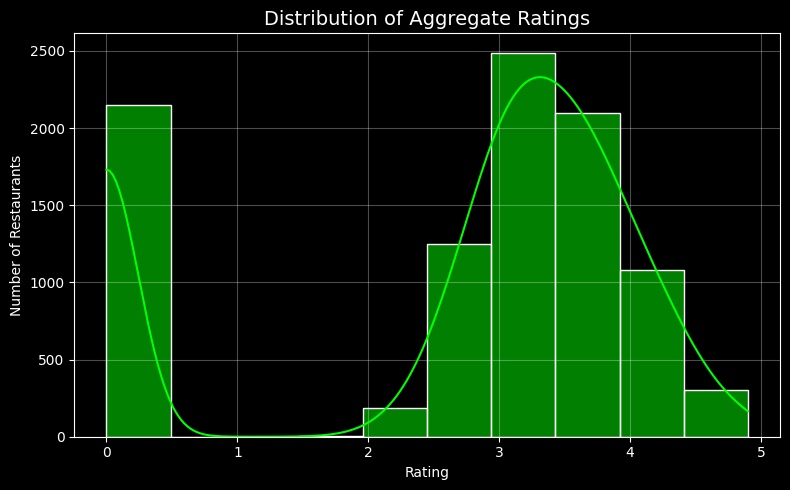

 Most common rating: 0.0
 Average votes per restaurant: 156.91


In [31]:
#Task 1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import folium
from folium.plugins import MarkerCluster
df = pd.read_csv("taskdataset.csv")
plt.style.use('dark_background')  
plt.figure(figsize=(8, 5))
sns.histplot(df['Aggregate rating'], bins=10, kde=True, color=random.choice(['cyan', 'magenta', 'orange', 'yellow', 'lime']))
plt.title('Distribution of Aggregate Ratings', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
most_common_rating = df['Aggregate rating'].value_counts().idxmax()
print(f" Most common rating: {most_common_rating}")
average_votes = df['Votes'].mean()
print(f" Average votes per restaurant: {round(average_votes, 2)}")


 Top 10 cuisine combinations:
 Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


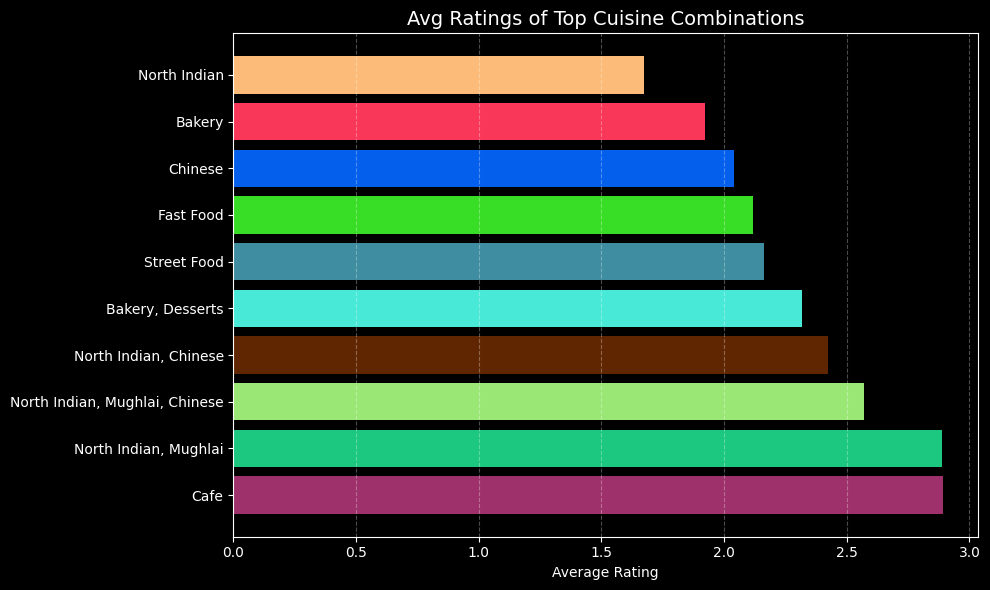

In [32]:
#task 2
combo_counts = df['Cuisines'].value_counts().head(10)
print(" Top 10 cuisine combinations:\n", combo_counts)
top_combos = combo_counts.index.tolist()
combo_ratings = df[df['Cuisines'].isin(top_combos)].groupby('Cuisines')['Aggregate rating'].mean().sort_values()
plt.figure(figsize=(10, 6))
colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in range(len(combo_ratings))]
plt.barh(combo_ratings.index, combo_ratings.values, color=colors)
plt.title('Avg Ratings of Top Cuisine Combinations', fontsize=14)
plt.xlabel('Average Rating')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [33]:
import os
print(os.getcwd())


C:\Users\arrkr


In [34]:
import folium
test_map = folium.Map(location=[12.9716, 77.5946], zoom_start=12)
test_map.save("simple_map.html")
print(" Test map saved as 'simple_map.html'")


 Test map saved as 'simple_map.html'


In [35]:
print("Non-empty Latitude:", df['Latitude'].notna().sum())
print("Non-empty Longitude:", df['Longitude'].notna().sum())


Non-empty Latitude: 9551
Non-empty Longitude: 9551


In [36]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
df = pd.read_csv("taskdataset.csv")
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=11, tiles='cartodbdark_matter')
marker_cluster = MarkerCluster().add_to(restaurant_map)

for _, row in df.head(50).iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Restaurant Name']} ({row['City']})",
        icon=folium.Icon(color='lightgray', icon='cutlery', prefix='fa')
    ).add_to(marker_cluster)


restaurant_map.save("restaurant_map.html")
print(" Map saved successfully as 'restaurant_map.html'")


 Map saved successfully as 'restaurant_map.html'


In [37]:
import os
print("Map saved to:", os.path.abspath("restaurant_map.html"))


Map saved to: C:\Users\arrkr\restaurant_map.html


In [38]:
#Tak 3
import webbrowser
webbrowser.open("restaurant_map.html")


True

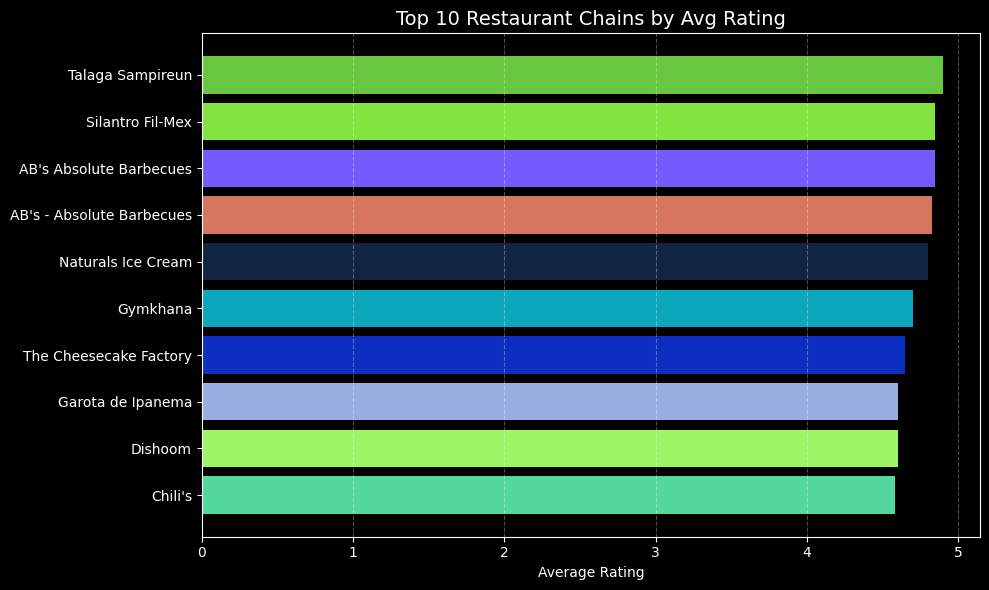

In [39]:
#Task 4
chain_counts = df['Restaurant Name'].value_counts()
chains = chain_counts[chain_counts > 1].index
chain_df = df[df['Restaurant Name'].isin(chains)]

chain_stats = chain_df.groupby('Restaurant Name')[['Aggregate rating', 'Votes']].mean()
top_chains = chain_stats.sort_values(by='Aggregate rating', ascending=False).head(10)

plt.figure(figsize=(10, 6))
colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in range(len(top_chains))]
plt.barh(top_chains.index, top_chains['Aggregate rating'], color=colors)
plt.title('Top 10 Restaurant Chains by Avg Rating', fontsize=14)
plt.xlabel('Average Rating')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [18]:
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable


In [30]:
import sys
print(sys.executable)


C:\Users\arrkr\AppData\Local\Programs\Python\Python313\python.exe


In [33]:
%pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [37]:
df = pd.read_csv("taskdataset.csv", encoding='utf-8')
print("Columns available:", df.columns.tolist())


Columns available: ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


In [35]:
print(df.columns)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [22]:
!pip install textblob


Defaulting to user installation because normal site-packages is not writeable


In [23]:
import sys
!{sys.executable} -m pip install textblob


  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached click-8.2.1-py3-none-any.whl (102 kB)

   ---------------------------------------- 0/4 [regex]
   ---------- ----------------------------- 1/4 [click]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4

In [23]:
#level 3


  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached click-8.2.1-py3-none-any.whl (102 kB)

   ---------------------------------------- 0/4 [regex]
   ---------- ----------------------------- 1/4 [click]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4

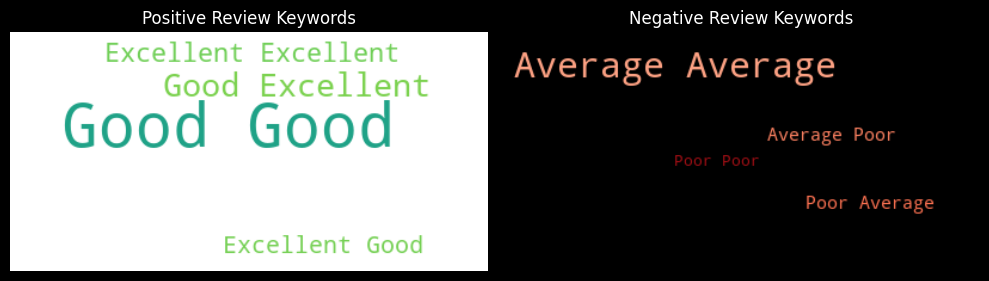

In [42]:
#Tak 1
from wordcloud import WordCloud
from textblob import TextBlob

df = pd.read_csv("taskdataset.csv", encoding='latin-1')

df = df.dropna(subset=['Rating text'])

def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

df['Review Sentiment'] = df['Rating text'].apply(get_sentiment)
positive_reviews = ' '.join(df[df['Review Sentiment'] > 0]['Rating text'])
negative_reviews = ' '.join(df[df['Review Sentiment'] < 0]['Rating text'])

wordcloud_pos = WordCloud(background_color='white').generate(positive_reviews)
wordcloud_neg = WordCloud(background_color='black', colormap='Reds').generate(negative_reviews)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Review Keywords')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Review Keywords')
plt.tight_layout()
plt.show()

df['Review Length'] = df['Rating text'].astype(str).apply(len)
avg_length = df['Review Length'].mean()

correlation = df['Review Length'].corr(df['Aggregate rating'])

avg_length, correlation
plt.show()



In [38]:
#Task 2

highest_votes = df[df['Votes'] == df['Votes'].max()]

lowest_votes = df[df['Votes'] == df['Votes'].min()]

correlation_votes_rating = df['Votes'].corr(df['Aggregate rating'])

# Display results
print("Restaurant with Highest Votes:")
print(highest_votes[['Restaurant Name', 'Votes', 'Aggregate rating']].head(1), end='\n\n')

print("Restaurant with Lowest Votes:")
print(lowest_votes[['Restaurant Name', 'Votes', 'Aggregate rating']].head(1), end='\n\n')

print(f"Correlation between Votes and Aggregate Rating: {correlation_votes_rating:.2f}")


Restaurant with Highest Votes:
  Restaurant Name  Votes  Aggregate rating
3     Burger King   2300               4.8

Restaurant with Lowest Votes:
  Restaurant Name  Votes  Aggregate rating
5     Spice Villa      0               2.0

Correlation between Votes and Aggregate Rating: 0.82


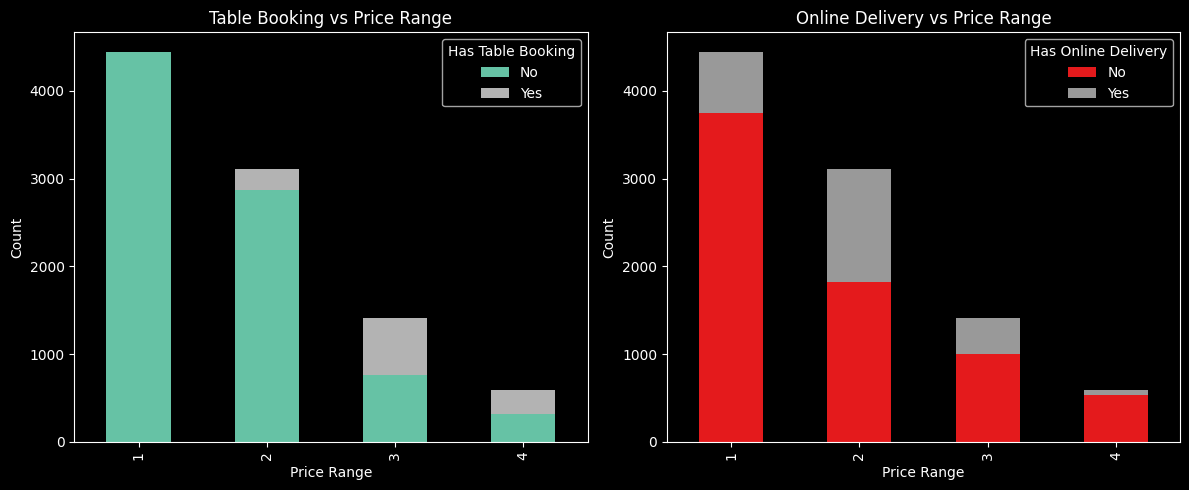

In [41]:
#Task 3
price_table_booking = pd.crosstab(df['Price range'], df['Has Table booking'])
price_online_delivery = pd.crosstab(df['Price range'], df['Has Online delivery'])
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
price_table_booking.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Set2')
plt.title('Table Booking vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='Has Table Booking')

plt.subplot(1, 2, 2)
price_online_delivery.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Set1')
plt.title('Online Delivery vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='Has Online Delivery')

plt.tight_layout()
plt.show()
